In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.8.0'

In [4]:
keras.__version__

'2.8.0'

# Tensor

In [5]:
import numpy as np
x = np.array(12)

In [6]:
x

array(12)

In [7]:
x.ndim # 축의 개수가 1

0

In [8]:
x = np.array([12, 3, 6, 14, 7])

In [9]:
x

array([12,  3,  6, 14,  7])

In [10]:
x.ndim # 축의 개수가 2, 5개의 원소를 가지고 있으므로 5차원 벡터

1

In [11]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])

In [12]:
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [13]:
x.ndim # 축의 개수가 2, 3개의 인스턴스를 가지고 있고, 각각의 인스턴스는 5개의 특성을 가짐

2

In [14]:
x = np.array([[[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
            [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
            [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]]])

In [15]:
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [16]:
x.ndim # 축의 개수가 3, 인스턴스가 3개, 각각의 인스턴스는 3x5의 특성을 가짐

3

# 텐서를 정의하는 세 가지 핵심 속성

### 1. 축의 개수 (.ndim)

3D텐서는 3개의 축이 존재

행렬에는 2개의 축이 존재

### 2. 모양 (.shape)

텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 튜플

In [17]:
x = np.array(12)
x.shape #축의 개수가 0

()

In [18]:
x = np.array([12, 3, 6, 14, 7])
x.shape # 축의 개수가 1, axis = 0에서 5차원 벡터

(5,)

In [19]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])
x.shape # 축의 개수가 2, axis = 0에서 5차원, axis = 1에서 3차원

(3, 5)

In [20]:
x = np.array([[[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]]])
x.shape # 축의 개수가 3, axis = 0에서 5차원, axis = 1에서 3차원, axis = 2에서 3차원

(3, 3, 5)

### 3. 데이터 타입 (.dtype)

텐서에 포함된 데이터 타입

In [21]:
x = np.array(12)
x.dtype

dtype('int32')

In [22]:
x = np.array([12, 3, 6, 14, 7])
x.dtype

dtype('int32')

In [23]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])
x.dtype

dtype('int32')

In [24]:
x = np.array([[[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]]])
x.dtype

dtype('int32')

# Fashion MNIST

In [25]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [26]:
X_train_full.shape # 각 이미지를 28 x 28의 2D배열로 표현

(60000, 28, 28)

In [27]:
X_train_full.dtype # 밝기를 0 - 255의 정수로 표현하므로 unsigned int형

dtype('uint8')

In [28]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. # 훈련셋 중 5000개를 검증셋, 나머지를 훈련셋으로 구성
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 
X_test = X_test / 255. # 픽셀 밝기 값을 스케일링

In [29]:
X_valid.shape

(5000, 28, 28)

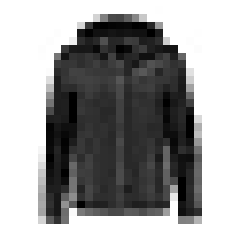

In [30]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [31]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [32]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [33]:
class_names[y_train[0]]

'Coat'

# Classification MLP

In [34]:
model = keras.models.Sequential()

In [35]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))

In [36]:
model.add(keras.layers.Dense(300, activation="relu"))

In [37]:
model.add(keras.layers.Dense(100, activation="relu"))

In [38]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [39]:
# 아래처럼 한번에 넘겨주는 방법도 있음

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.layers

In [42]:
hidden1 = model.layers[1]
hidden1.name # 생성된 층에서 1번째 인덱스를 가져와 이름 출력

'dense'

In [43]:
weights, biases = hidden1.get_weights() # 첫 은닉층의 가중치 행렬과 편향 벡터를 저장

In [44]:
weights

array([[-0.05564849,  0.04111084,  0.05896877, ..., -0.02336577,
         0.0351707 ,  0.07063453],
       [ 0.04756152, -0.06690099,  0.05784214, ...,  0.06749165,
         0.0279766 ,  0.00632718],
       [ 0.01109572,  0.04528692, -0.02178519, ...,  0.0103812 ,
         0.04834127,  0.0594673 ],
       ...,
       [-0.00144791, -0.03628711,  0.04591058, ..., -0.03627999,
        -0.06287093, -0.04267107],
       [ 0.04873965,  0.03373312, -0.05731013, ..., -0.02671612,
         0.04308553,  0.06781562],
       [-0.05713595, -0.01390243, -0.04965851, ...,  0.05029842,
        -0.01235679,  0.06042567]], dtype=float32)

In [45]:
weights.shape

(784, 300)

In [46]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [47]:
biases.shape

(300,)

In [48]:
# 모델 컴파일

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [49]:
# 모델 학습과 평가

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.7066 - accuracy: 0.7677 - val_loss: 0.4958 - val_accuracy: 0.8358
Epoch 2/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4845 - accuracy: 0.8297 - val_loss: 0.4620 - val_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4402 - accuracy: 0.8461 - val_loss: 0.4090 - val_accuracy: 0.8622
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4128 - accuracy: 0.8566 - val_loss: 0.4092 - val_accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3943 - accuracy: 0.8613 - val_loss: 0.3819 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3785 - accuracy: 0.8668 - val_loss: 0.4108 - val_accuracy: 0.8584
Epoch 7/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3659 - accuracy: 0.8711 - val_loss: 0.3626 - val_acc

In [50]:
print(history.epoch) # 에포크 리스트

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [51]:
history.params # 학습 파라미터

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [52]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


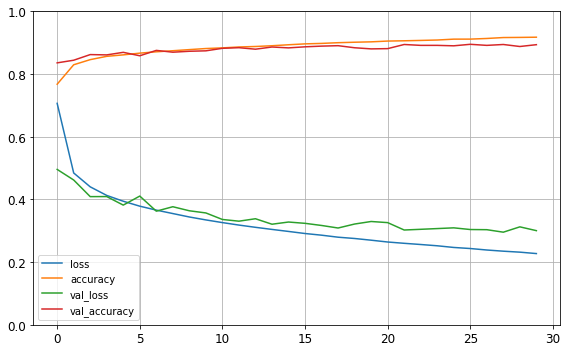

In [53]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [54]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3278 - accuracy: 0.8830


[0.32783618569374084, 0.8830000162124634]

In [55]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [56]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1) # 예측 결과 확률이 가장 높은 클래스
y_pred

array([9, 2, 1], dtype=int64)

In [57]:
np.array(class_names)[y_pred] # 해당 클래스 이름 출력

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [58]:
y_new = y_test[:3] # 실제 타겟값 클래스 출력
y_new #예측 클래스와 동일 확인

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


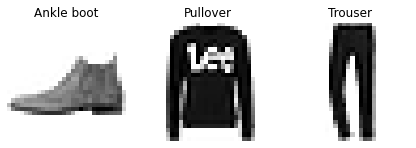

In [59]:
plt.figure(figsize=(7.2, 2.4)) # 클래스 이미지 그리기
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

In [60]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [61]:
np.random.seed(42)
tf.random.set_seed(42)

In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4875 - val_loss: 0.4656

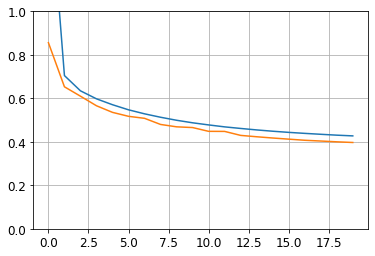

In [63]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()